<a href="https://colab.research.google.com/github/tmq24/MachineLearning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercise
This is a dataset related to how much money a person can get from a mortgage on his or her home. This dataset includes the following features:
* Gender: Gender of the borrower (including two values 'F' and 'M')
* Age: Age of the customer applying for a loan (including positive integer values)
* Income (USD): Customer's income in USD (value is a positive number)
* Income Stability: The level of customer's income stability (including three values of Low and High)
* Property Age: Life expectancy of the house in days (including positive integer values)
* Property Location: Location of the house (including 'Rural', 'Urban', and 'Semi-Urban')
* Property Price: The value of the house in USD (including positive real values)
* Loan Sanction Amount (USD): Amount that customers can borrow in USD (target value)

Based on practice sample #1, proceed:
1. Read data
2. Visualize some information of data
3. Normalize Data to train linear regression model
4. Train linear regression model and show the model's intercepts, coeficients
5. Learn on sklearn how to use Ridge, Lasso, and ElasticNet compare the error of all 3 algorithms with Linear Regression (https://scikit-learn.org/stable/index.html)
6. Let's try Polynomial of order 2 to compare the previous results. What will the result be if we choose the n order too high?


**Submission Link**: https://forms.gle/uKAq34QrbwTcbs5Z9 (Submit your .ipynb file)

In [ ]:
# mount data from google drive to colab
from google.colab import drive
drive.mount('/content/drive')

#import library
import pandas as pd # pandas
import numpy as np # numpy
import time


Mounted at /content/drive


In [ ]:
!pip install gdown

import gdown

file_id = "1qSr8dh0Jm1NudUSyrx1WsUtW4-9hWWpS"
url = f"https://drive.google.com/uc?id={file_id}"

output = "final_house_loan.csv"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1qSr8dh0Jm1NudUSyrx1WsUtW4-9hWWpS
To: /content/final_house_loan.csv
100%|██████████| 2.85M/2.85M [00:00<00:00, 143MB/s]


'final_house_loan.csv'

# Prepare and Analyze Data

1. Load Dataset
2. Analyze Dataset
3. Preprocess data (type, null, missing, ...)
4. Feature Engineering

## Load Dataset

In [ ]:
# read data using Pandas DataFrame
def read_dataset(path):
    # Todo: read_csv from a path and return a DataFrame
    df = pd.read_csv(path)
    display(df.head())
    display(df.describe())
    display(df.info())
    print("\nUnique values in each column:")
    for column in df.columns:
        print(f"\n{column}:", df[column].unique())
    return df

In [ ]:
PATH = "/content/final_house_loan.csv" # Path to your file

df = read_dataset(PATH)
#ToDo: Show histogram of dataframe

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47297.000000,47265.000000,47263.000000,4.729700e+04,47297.000000
mean,40.000063,2586.684384,2586.611058,1.350880e+05,46487.229765
std,16.086128,1558.768809,1558.842286,9.457875e+04,32549.905634
min,18.000000,372.700000,370.700000,7.859620e+03,254.586578
25%,24.000000,1653.740000,1652.820000,6.250408e+04,21782.822159
50%,40.000000,2245.480000,2244.810000,1.130936e+05,38822.132402
75%,55.000000,3128.560000,3128.380000,1.819546e+05,62612.236905
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165218


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47297 entries, 0 to 47296
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      47297 non-null  object 
 1   Age                         47297 non-null  int64  
 2   Income (USD)                47265 non-null  float64
 3   Income Stability            47285 non-null  object 
 4   Property Age                47263 non-null  float64
 5   Property Location           47294 non-null  object 
 6   Property Price              47297 non-null  float64
 7   Loan Sanction Amount (USD)  47297 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 2.9+ MB


None


Unique values in each column:

Gender: ['F' 'M']

Age: [19 29 37 65 62 28 59 21 60 61 48 26 44 52 64 63 18 45 20 50 22 56 25 38
 46 43 30 53 51 34 40 35 24 54 36 31 58 23 49 33 55 42 32 27 47 57 41 39]

Income (USD): [1641.25 1989.71 1849.91 ... 2778.23 1506.72  492.91]

Income Stability: ['Low' 'High' nan]

Property Age: [1651.25 1990.71 1856.91 ... 1582.1  2007.27  497.91]

Property Location: ['Rural' 'Urban' 'Semi-Urban' nan]

Property Price: [ 59641.82 179858.51 117297.62 ...  72822.94  43514.12 155634.69]

Loan Sanction Amount (USD): [21026.42075326 60595.1833664  39181.64800231 ... 72483.29335887
 52462.8614975  22909.59676252]


## Data Analysis

In [ ]:
# Data analysis
# Todo: analyze your data here

<Axes: xlabel='Loan Sanction Amount (USD)', ylabel='Count'>

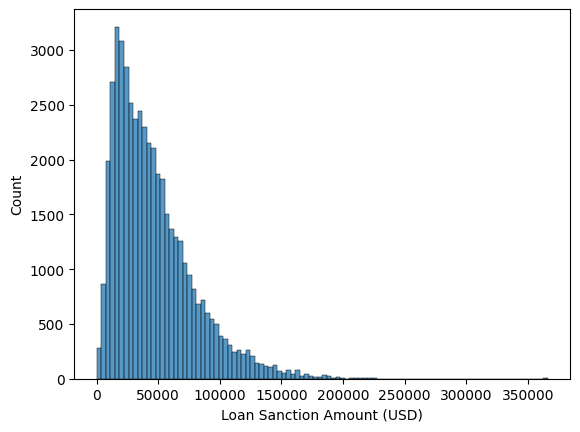

In [ ]:
import seaborn as sns
sns.histplot(x="Loan Sanction Amount (USD)", data=df, bins=100)

In [ ]:
# Null checking
missing_values_count = df.isna().sum()
print(missing_values_count)
print("missing values proportion:")
print(missing_values_count.sum()/len(df))

Gender                         0
Age                            0
Income (USD)                  32
Income Stability              12
Property Age                  34
Property Location              3
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64
missing values proportion:
0.0017125821933737869


## Preprocessing

In [ ]:
def preprocessing_data(df):
    # --- (Optional) Drop null datapoints or fill missing data
    # Keep your data the same if you dont want to customize it
    df = df.dropna()
    return df

In [ ]:
df = preprocessing_data(df.copy())

## Feature Engineering

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

def normalize_data(df):
    df = df.copy()  # Todo: normalize data into numerical data

    label_encoders = {}
    categorical_columns = ['Gender', 'Income Stability', 'Property Location']

    for column in categorical_columns:
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])

    return df

# Run the function
df = normalize_data(df)
display(df.head())
display(df.corr())

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,0,19,1641.25,1,1651.25,0,59641.82,21026.420753
1,1,29,1989.71,1,1990.71,2,179858.51,60595.183366
2,0,37,1849.91,1,1856.91,0,117297.62,39181.648002
3,1,65,2735.18,0,2747.18,0,354417.72,128497.710865
4,0,62,4741.78,0,4740.78,2,82049.80,39386.919336


,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
Gender,1.000000,0.007706,-0.002445,-0.019000,-0.002512,0.009142,0.005931,0.003396
Age,0.007706,1.000000,-0.044086,-0.455855,-0.044085,-0.007770,-0.003274,-0.000115
Income (USD),-0.002445,-0.044086,1.000000,0.080961,0.999986,-0.000199,0.358110,0.392897
Income Stability,-0.019000,-0.455855,0.080961,1.000000,0.081008,-0.001959,0.004813,-0.070969
Property Age,-0.002512,-0.044085,0.999986,0.081008,1.000000,-0.000233,0.358110,0.392892
Property Location,0.009142,-0.007770,-0.000199,-0.001959,-0.000233,1.000000,-0.000898,-0.001988
Property Price,0.005931,-0.003274,0.358110,0.004813,0.358110,-0.000898,1.000000,0.994429
Loan Sanction Amount (USD),0.003396,-0.000115,0.392897,-0.070969,0.392892,-0.001988,0.994429,1.000000


<Axes: >

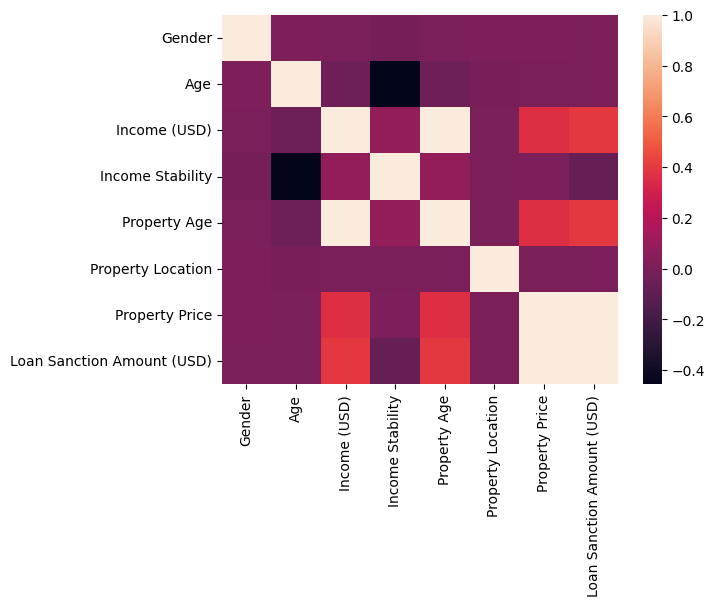

In [ ]:
# Heatmap
import seaborn as sns

df = normalize_data(df.copy())
sns.heatmap(df.corr()) # Show heatmap after normalized data

# Apply machine learning model

## Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
def prepare_X_y(df):
    # Split data into X and y. Return two dataframes
    columns = df.columns.tolist()
    columns.remove('Loan Sanction Amount (USD)')
    X = df[columns]        # X
    y = df['Loan Sanction Amount (USD)']  # y
    print("X shape:", X.shape)
    print("y shape:", y.shape)
    return X, y

X, y = prepare_X_y(df)

X shape: (47251, 7)
y shape: (47251,)


In [ ]:
def split_train_test(X, y, train_size=0.7):
    trainX, testX ,trainY, testY = train_test_split(X, y, train_size=train_size, random_state=2023)
    print('Training:' + str(trainX.shape))
    print('Test:' + str(testX.shape))

    return trainX, testX ,trainY, testY

In [ ]:
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = split_train_test(X, y, train_size=TRAIN_SIZE)

Training:(33075, 7)
Test:(14176, 7)


## Basic Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression


def build_linear_model(X, y):
    model = LinearRegression(fit_intercept=True)
    model.fit(trainX, trainY)

    return model

model = build_linear_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  163.14116153145872
mean absolute error of linear model on test set  137.10457506737418
[-2.34483815e+02 -7.93861753e+01  5.50183711e-01 -1.11431363e+04
  4.74551612e-01 -6.02929137e+01  3.36339576e-01]

11896.351699425148


In [ ]:
from sklearn.linear_model import Lasso

def build_lasso_model(X, y):
    model = Lasso(alpha=0.01, fit_intercept=True) # Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y
    model.fit(trainX, trainY)

    return model

model = build_lasso_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  163.18727759849236
mean absolute error of linear model on test set  137.13515145477697
[-2.34474444e+02 -7.93839297e+01  8.56021067e-01 -1.11428903e+04
  1.68737862e-01 -6.03096110e+01  3.36339553e-01]

11895.982241174686


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.294e+10, tolerance: 3.490e+09
  model = cd_fast.enet_coordinate_descent(


In [ ]:
from sklearn.linear_model import Ridge

def build_ridge_model(X, y):
    model = Ridge(alpha=1.0, fit_intercept=True) # Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y
    model.fit(trainX, trainY)
    return model

model = build_ridge_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  163.27104902986133
mean absolute error of linear model on test set  137.22286291308296
[-2.34413176e+02 -7.93438667e+01  5.51497567e-01 -1.11378235e+04
  4.73173644e-01 -6.02824252e+01  3.36339895e-01]

11889.892895035533


In [ ]:
from sklearn.linear_model import ElasticNet

def build_elastic_model(X, y):
    model = ElasticNet(alpha=0.01, l1_ratio=0.5, fit_intercept=True)# Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y
    model.fit(trainX, trainY)
    return model

model = build_elastic_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  261.80513914136185
mean absolute error of linear model on test set  236.26859618799392
[-2.23519463e+02 -7.28969547e+01  8.63274559e-01 -1.03282808e+04
  1.51637294e-01 -5.86680304e+01  3.36388443e-01]

10905.612293522936


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.243e+10, tolerance: 3.490e+09
  model = cd_fast.enet_coordinate_descent(


## Polynomial Transform

When the data feature does not conform to a linear function, a linear regression cannot be applied directly to the original data. Then, there are many possibilities that the data feature conforms to the polynomial function. Scikit-Learn supports converting data features to polynomials through ``PolynomialFeatures``.

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

The formula above uses the transformation of the value $x$ from one dimension to the other, with the aim of being able to use linear regression to find complex relationships between $x$ and $y$.

In [ ]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y):
    poly_model = make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression()) # use make_pipeline to apply PolynomialFeatures and a Regression model train your dataset
    poly_model.fit(X, y)

    return poly_model

poly_model = build_pipeline(trainX, trainY)
# Compare on training dataset
poly_pred = poly_model.predict(trainX)
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

poly_pred = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred, y_true=testY))

mean absolute error of linear model (with poly transform) on train set  202.84961528858895
mean absolute error of linear model (with poly transform) on test set  176.80823110552163


In [ ]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y):
    poly_model = make_pipeline(PolynomialFeatures(10, include_bias=False), LinearRegression()) # use make_pipeline to apply PolynomialFeatures and a Regression model train your dataset
    poly_model.fit(X, y)

    return poly_model

poly_model = build_pipeline(trainX, trainY)
# Compare on training dataset
poly_pred = poly_model.predict(trainX)
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

poly_pred = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred, y_true=testY))

Nêu tăng n order quá cao sẽ làm tăng features của mô hình lên cao làm cho tràn RAM